In [4]:
# Python 3.8
import pandas as pd
import numpy  as np
np.bool = np.bool_

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [3]:
df = pd.read_csv('./diamonds_nan.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header=None, # если заголовки отсутствуют
                   # na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[10:20] # отобразить первые строки таблицы df 

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
10,11.0,0.30,NaN,J,SI1,64.0,55.0,339.0,4.25,4.28,2.73
11,12.0,0.23,Ideal,J,VS1,62.8,56.0,340.0,3.93,3.90,2.46
12,13.0,0.22,Premium,F,SI1,60.4,61.0,342.0,3.88,3.84,2.33
13,14.0,0.31,Ideal,J,SI2,62.2,54.0,344.0,4.35,4.37,2.71
14,15.0,0.20,Premium,E,SI2,60.2,62.0,345.0,3.79,3.75,2.27
15,16.0,0.32,Premium,E,I1,60.9,58.0,345.0,4.38,4.42,2.68
16,17.0,0.30,Ideal,I,SI2,62.0,54.0,348.0,4.31,4.34,2.68
17,18.0,0.30,Good,J,SI1,63.4,54.0,351.0,4.23,4.29,2.70
18,19.0,0.30,Good,J,SI1,63.8,56.0,351.0,4.23,4.26,2.71
19,20.0,0.30,Very Good,J,SI1,62.7,59.0,351.0,4.21,4.27,2.66


In [35]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (53690, 11)


In [4]:
features = ['x', 'y', 'z', 'cut', 'color', 'clarity', 'table', 'carat', 'depth']
target = ['price']
df = df [features+target]
df[:10]

,x,y,z,cut,color,clarity,table,carat,depth,price
0,3.95,3.98,2.43,Ideal,E,SI2,55.0,0.23,61.5,326.0
1,3.89,3.84,2.31,Premium,E,SI1,61.0,0.21,59.8,326.0
2,4.05,4.07,2.31,Good,E,VS1,65.0,0.23,56.9,327.0
3,4.20,4.23,2.63,Premium,I,VS2,58.0,0.29,62.4,334.0
4,4.34,4.35,2.75,Good,J,SI2,58.0,0.31,63.3,335.0
5,3.94,3.96,2.48,Very Good,J,VVS2,57.0,0.24,62.8,336.0
6,3.95,3.98,2.47,Very Good,I,VVS1,57.0,0.24,62.3,336.0
7,4.07,4.11,2.53,Very Good,H,SI1,55.0,0.26,61.9,337.0
8,3.87,3.78,2.49,Fair,E,VS2,61.0,0.22,65.1,337.0
9,4.00,4.05,2.39,Very Good,H,VS1,61.0,0.23,59.4,338.0


In [5]:
df.loc[df["cut"] == "Fair", "cut"] = 0
df.loc[df["cut"] == "Good", "cut"] = 1
df.loc[df["cut"] == "Very Good", "cut"] = 2
df.loc[df["cut"] == "Premium", "cut"] = 3
df.loc[df["cut"] == "Ideal", "cut"] = 4

In [6]:
df.loc[df["color"] == "J", "color"] = 0
df.loc[df["color"] == "I", "color"] = 1
df.loc[df["color"] == "H", "color"] = 2
df.loc[df["color"] == "G", "color"] = 3
df.loc[df["color"] == "F", "color"] = 4
df.loc[df["color"] == "E", "color"] = 5
df.loc[df["color"] == "D", "color"] = 6

In [7]:
df.loc[df["clarity"] == "I1", "clarity"] = 0
df.loc[df["clarity"] == "SI2", "clarity"] = 1
df.loc[df["clarity"] == "SI1", "clarity"] = 2
df.loc[df["clarity"] == "VS2", "clarity"] = 3
df.loc[df["clarity"] == "VS1", "clarity"] = 4
df.loc[df["clarity"] == "VVS2", "clarity"] = 5
df.loc[df["clarity"] == "VVS1", "clarity"] = 6
df.loc[df["clarity"] == "IF", "clarity"] = 7

In [8]:
df[:10]

,x,y,z,cut,color,clarity,table,carat,depth,price
0,3.95,3.98,2.43,4,5,1,55.0,0.23,61.5,326.0
1,3.89,3.84,2.31,3,5,2,61.0,0.21,59.8,326.0
2,4.05,4.07,2.31,1,5,4,65.0,0.23,56.9,327.0
3,4.20,4.23,2.63,3,1,3,58.0,0.29,62.4,334.0
4,4.34,4.35,2.75,1,0,1,58.0,0.31,63.3,335.0
5,3.94,3.96,2.48,2,0,5,57.0,0.24,62.8,336.0
6,3.95,3.98,2.47,2,1,6,57.0,0.24,62.3,336.0
7,4.07,4.11,2.53,2,2,2,55.0,0.26,61.9,337.0
8,3.87,3.78,2.49,0,5,3,61.0,0.22,65.1,337.0
9,4.00,4.05,2.39,2,2,4,61.0,0.23,59.4,338.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53690 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        53690 non-null  float64
 1   y        53690 non-null  float64
 2   z        53690 non-null  float64
 3   cut      53690 non-null  object 
 4   color    53690 non-null  object 
 5   clarity  53690 non-null  object 
 6   table    53690 non-null  float64
 7   carat    53690 non-null  float64
 8   depth    53690 non-null  float64
 9   price    53690 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


In [10]:
df["cut"] = pd.to_numeric(df["cut"])
df["color"] = pd.to_numeric(df["color"])
df["clarity"] = pd.to_numeric(df["clarity"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53690 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        53690 non-null  float64
 1   y        53690 non-null  float64
 2   z        53690 non-null  float64
 3   cut      53690 non-null  int64  
 4   color    53690 non-null  int64  
 5   clarity  53690 non-null  int64  
 6   table    53690 non-null  float64
 7   carat    53690 non-null  float64
 8   depth    53690 non-null  float64
 9   price    53690 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.5 MB


In [12]:
df[:10]
len(df)

53690

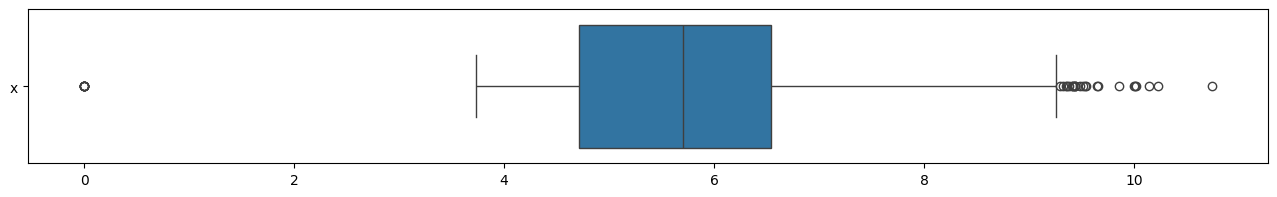

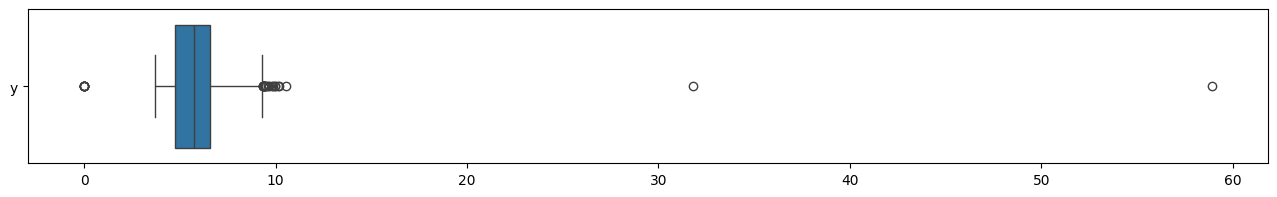

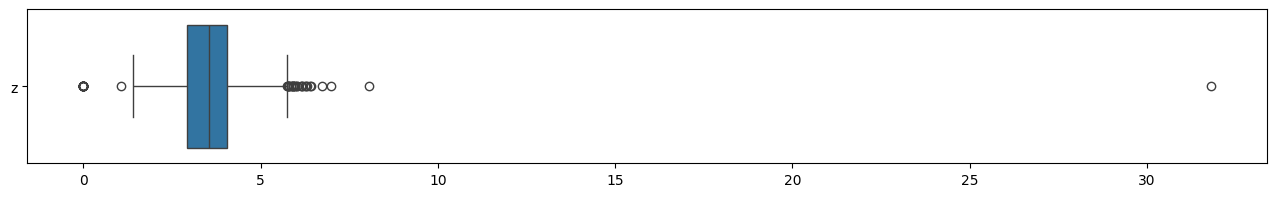

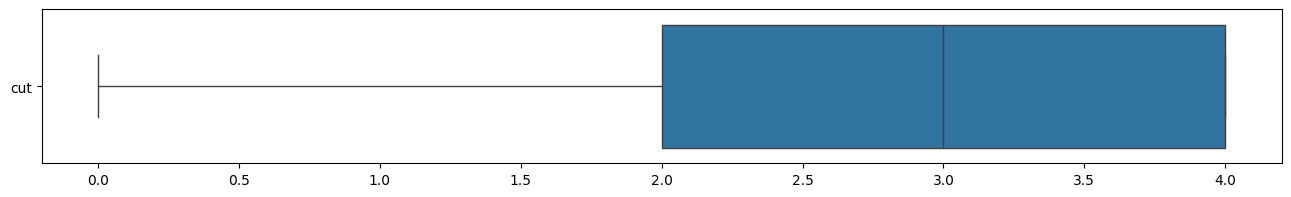

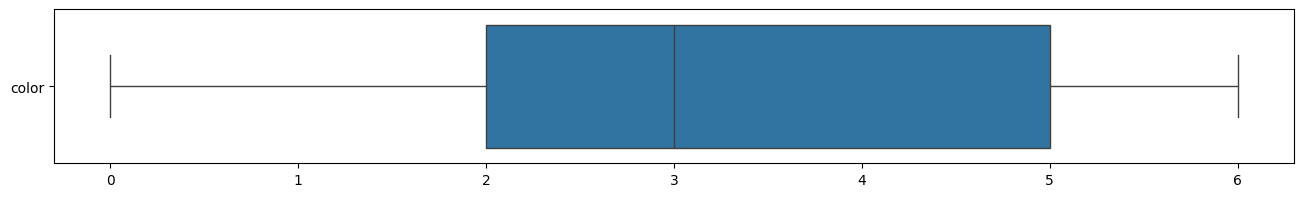

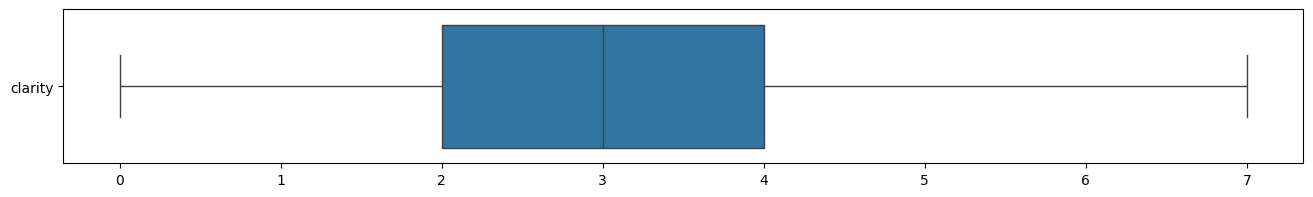

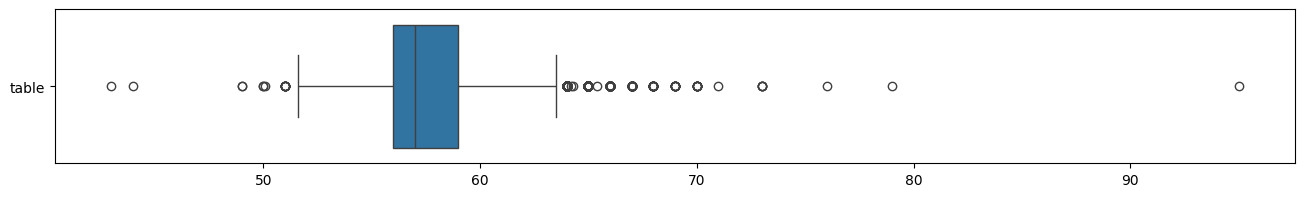

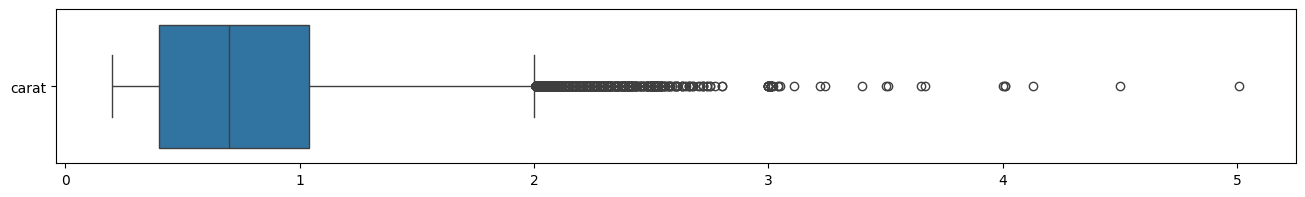

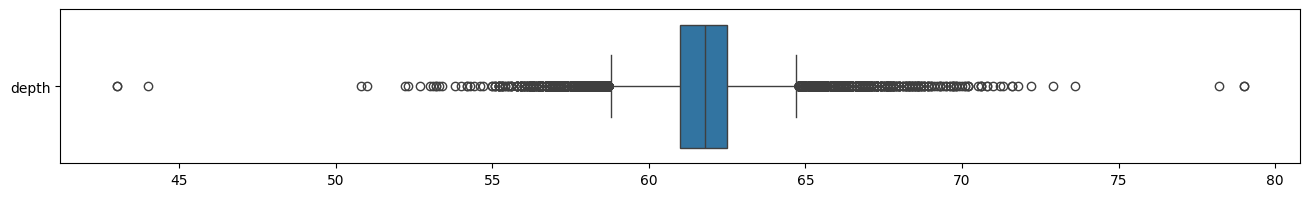

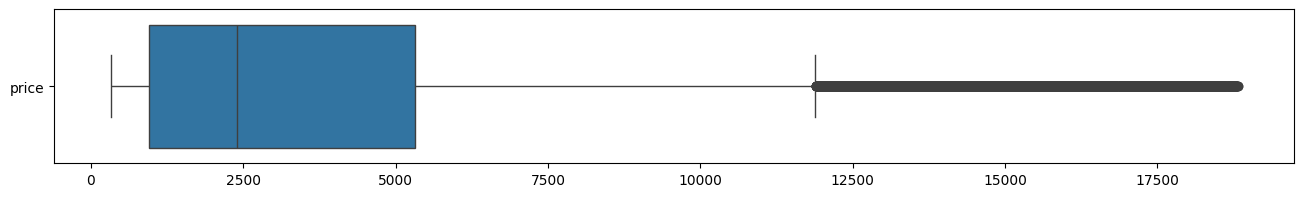

In [13]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):
    
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))
    
    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df[[feature_name]], # данные
                 orient='h' # ориентация графика
               )

In [14]:
x_Threshold     = (3.9,8.0)           
table_Threshold = (53, 63)           
price_Threshold  = (450.0, 10500.0)       
carat_Threshold     = (0.3, 1.8)    

# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = { 
    'x'     : x_Threshold,
    'table' : table_Threshold,
    'price'  : price_Threshold,
    'carat'     : carat_Threshold,
}

print (tressholdDict)

{'x': (3.9, 8.0), 'table': (53, 63), 'price': (450.0, 10500.0), 'carat': (0.3, 1.8)}


In [15]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df[ 
                            ~(df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax) # фильтр по двум границам. ~ инверсия логических значений
                          ] 
                    )
    
    dcount = df[feature_name].count() # кол-во эл. общее
    
    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format( 
        feature_name, 
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

x. Принимаем пороговые значение равными (3.9, 8.0).
  Кол-во эл. вне пороговых - 65 из 53690 значение(ий) (0.1%)

table. Принимаем пороговые значение равными (53, 63).
  Кол-во эл. вне пороговых - 76 из 53690 значение(ий) (0.1%)

price. Принимаем пороговые значение равными (450.0, 10500.0).
  Кол-во эл. вне пороговых - 853 из 53690 значение(ий) (1.6%)

carat. Принимаем пороговые значение равными (0.3, 1.8).
  Кол-во эл. вне пороговых - 1590 из 53690 значение(ий) (3.0%)



In [16]:

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]
    
    
    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df = df[ 
        (df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax) 
        ]
    print("Обработан ", feature_name )
    
    
print ("Осталось {} строк.".format(
    len(df))
)

Обработан  x
Обработан  table
Обработан  price
Обработан  carat
Осталось 46113 строк.


In [17]:
df.to_csv('./diamonds_nan_PREPARED3.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

In [18]:
df[:10]

,x,y,z,cut,color,clarity,table,carat,depth,price
60,4.54,4.59,2.78,4,1,4,57.0,0.35,60.9,552.0
61,4.23,4.27,2.66,3,6,2,59.0,0.30,62.6,552.0
62,4.29,4.32,2.69,4,6,2,57.0,0.30,62.5,552.0
63,4.30,4.33,2.68,4,6,2,56.0,0.30,62.1,552.0
64,4.78,4.84,2.96,3,1,1,59.0,0.42,61.5,552.0
66,4.39,4.42,2.73,4,1,6,55.3,0.32,62.0,553.0
67,4.33,4.30,2.73,2,3,2,57.0,0.31,63.3,553.0
68,4.35,4.32,2.68,3,3,2,58.0,0.31,61.8,553.0
71,4.29,4.27,2.70,2,2,2,56.0,0.30,63.1,554.0
72,4.28,4.24,2.68,3,2,2,59.0,0.30,62.9,554.0


In [9]:
df_test = pd.read_csv('./diamonds_nan_PREPARED3.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                        # header=None, # если заголовки отсутствуют
                   # na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df_test[46544:46546] # отобразить первые строки таблицы df 

,x,y,z,cut,color,clarity,table,carat,depth,price


In [7]:
df_test.sample(n=10)

,x,y,z,cut,color,clarity,table,carat,depth,price
28715,4.64,4.68,2.89,2,4,3,54.6,0.38,61.9,906.0
44676,5.65,5.72,3.48,2,1,6,58.0,0.70,61.2,2513.0
36139,5.30,5.33,3.29,4,1,3,57.0,0.57,61.9,1410.0
5682,6.46,6.52,4.06,2,2,1,58.0,1.06,62.6,3958.0
4988,6.42,6.44,4.03,2,0,1,55.0,1.01,62.7,3793.0
4888,6.42,6.47,3.96,3,6,0,60.0,1.02,61.4,3769.0
44039,5.66,5.70,3.37,1,2,7,62.0,0.63,59.3,2404.0
41106,5.87,5.90,3.62,4,0,3,54.0,0.75,61.5,2001.0
37722,5.39,5.43,3.21,4,5,3,57.0,0.55,59.3,1643.0
36647,4.26,4.30,2.68,4,1,5,56.0,0.30,62.6,515.0


In [8]:
df_test.describe()

,x,y,z,cut,color,clarity,table,carat,depth,price
count,46113.000000,46113.000000,46113.000000,46113.000000,46113.000000,46113.000000,46113.000000,46113.000000,46113.000000,46113.000000
mean,5.589568,5.592745,3.453603,2.945807,3.464424,3.042830,57.339483,0.717391,61.776725,3053.966452
std,0.925806,0.928388,0.590586,1.099922,1.685923,1.628812,2.066623,0.351008,1.387390,2482.664362
min,4.140000,4.050000,0.000000,0.000000,0.000000,0.000000,53.000000,0.300000,43.000000,450.000000
25%,4.730000,4.730000,2.920000,2.000000,2.000000,2.000000,56.000000,0.400000,61.100000,961.000000
50%,5.610000,5.610000,3.460000,3.000000,3.000000,3.000000,57.000000,0.700000,61.900000,2202.000000
75%,6.410000,6.400000,3.970000,4.000000,5.000000,4.000000,59.000000,1.010000,62.500000,4563.000000
max,7.970000,31.800000,31.800000,4.000000,6.000000,7.000000,63.000000,1.800000,78.200000,10499.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46113 entries, 60 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        46113 non-null  float64
 1   y        46113 non-null  float64
 2   z        46113 non-null  float64
 3   cut      46113 non-null  int64  
 4   color    46113 non-null  int64  
 5   clarity  46113 non-null  int64  
 6   table    46113 non-null  float64
 7   carat    46113 non-null  float64
 8   depth    46113 non-null  float64
 9   price    46113 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.9 MB
